# Regression Methods Ric

**Goal of the Notebook**

Select two continuous attributes, define a simple linear univariate regression problem and try to solve it using different techniques reporting various evaluation measures. Plot the two-dimensional dataset. Then generalize to multiple linear regression and observe how the performance varies. Solve it using linear regressions, regularized linear regressions (such as Lasso and Ridge) but also machine learning approaches such as Gradient Boosting Machines.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
######## Hyperparameter Tuning #######
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

######## Evaluation #######
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
df_train = pd.read_csv('csv/New_train.csv')
df_test = pd.read_csv('csv/New_test.csv')

In [4]:
to_drop_train = ['ActivityName','Activity','subject','Outlier_label', 'Class'] 
train = df_train.drop(to_drop_train, axis=1, inplace=False)

to_drop_test = ['ActivityName','Activity','subject', 'Class'] 
test = df_test.drop(to_drop_test, axis=1, inplace=False)

***

## 1. Univariate problem

In [5]:
X_train = train.iloc[:,[0]].values # first column selected as independent variable 
X_test = test.iloc[:,[0]].values

y_train = train.iloc[:,[1]].values # first column selected as dependent variable
y_test = test.iloc[:,[1]].values

### 1.1 Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
reg = LinearRegression()

reg.fit(X = X_train, y = y_train)

y_pred = reg.predict(X_test)

In [8]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.024
MSE: 0.001
MAE: 0.015


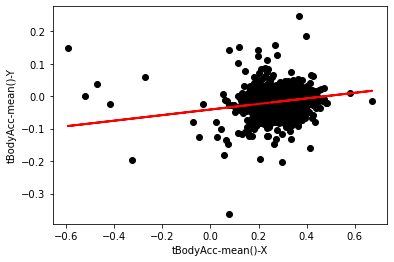

In [9]:
plt.scatter(X_test, y_test , color='black')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='test')
plt.xlabel('tBodyAcc-mean()-X')
plt.ylabel('tBodyAcc-mean()-Y')
plt.show()

In [10]:
reg.intercept_

array([-0.04130137])

In [11]:
variance_predicted = 0
for i , e in zip(y_test, y_pred):
    variance_predicted += (i-e)**2

In [12]:
variance_predicted

array([2.00002912])

In [18]:
mean_y = np.mean(y_test)
mean_y

-0.017863400266845325

In [19]:
variance_model = 0
for e in y_test:
    variance_model += (e-mean_y)**2

In [20]:
variance_model

array([1.95265872])

In [21]:
variance_predicted / variance_model

array([1.02425943])

In [23]:
R2 = 1 - (variance_predicted / variance_model)
R2

array([-0.02425943])

---

## 2. Multivariate problem

In [13]:
test.iloc[:,[1]].columns # retrive the name of the attribute

Index(['tBodyAcc-mean()-Y'], dtype='object')

In [14]:
attributes = [col for col in train.columns if col != 'tBodyAcc-mean()-Y']

X_train = train[attributes].values
y_train = train['tBodyAcc-mean()-Y'].values

X_test = test[attributes].values
y_test = test['tBodyAcc-mean()-Y'].values

### 2.1 Linear Regression

In [15]:
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = reg.predict(X_test)

In [17]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.238
MSE: 0.001
MAE: 0.016


### 2.2 Lasso

In [18]:
from sklearn.linear_model import Lasso

In [19]:
reg = Lasso()
reg.fit(X_train, y_train)

Lasso()

In [20]:
y_pred = reg.predict(X_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.000
MSE: 0.001
MAE: 0.015


### 2.3 Ridge

In [21]:
from sklearn.linear_model import Ridge

In [22]:
reg = Ridge()
reg.fit(X_train, y_train)

Ridge()

In [23]:
y_pred = reg.predict(X_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.275
MSE: 0.000
MAE: 0.016


### 2.4 Gradient Boosting Regressor

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

In [39]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [40]:
y_pred = reg.predict(X_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.574
MSE: 0.000
MAE: 0.009


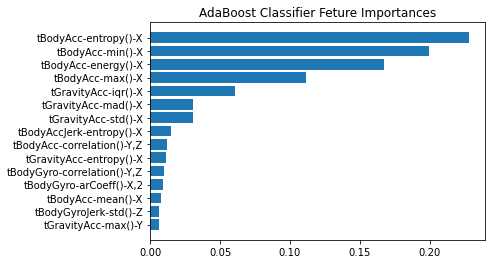

In [41]:
nbr_features = 15

gb_feature_importances = reg.feature_importances_ 
sorted_idx = gb_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, gb_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(df_train.columns)[sorted_idx])
plt.title("GradientBoosting Regressor Feture Importances")
plt.show()

### 2.5 Random Forest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
reg = RandomForestRegressor(max_depth=2, 
                            random_state=0,
                            criterion ='squared_error')
reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [44]:
y_pred = reg.predict(X_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.007
MSE: 0.001
MAE: 0.015


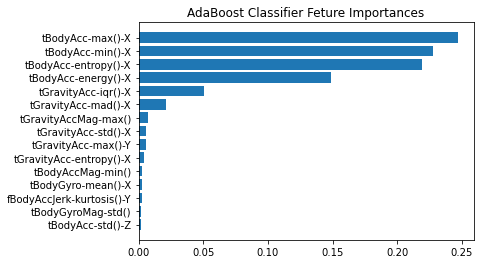

In [45]:
nbr_features = 15

feature_importances = reg.feature_importances_ 
sorted_idx = feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(df_train.columns)[sorted_idx])
plt.title("RandomForest Regressor Feture Importances")
plt.show()

### 2.6 Multi-Layer Perceptron Regressor

In [46]:
from sklearn.neural_network import MLPRegressor

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
reg = MLPRegressor( solver = 'sgd',
                    hidden_layer_sizes=(128, 64, 32,),
                    random_state=0, 
                    activation = 'tanh',
                    learning_rate = 'adaptive',
                    early_stopping=True, 
                    momentum=0.9
                    )

In [52]:
reg.fit(X_train, y_train)

/Users/riccardo/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', early_stopping=True,
             hidden_layer_sizes=(128, 64, 32), learning_rate='adaptive',
             random_state=0, solver='sgd')

In [53]:
y_pred = reg.predict(X_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -3.467
MSE: 0.003
MAE: 0.038
